# Effects of Different Features on Students Performace
## by Nishant Jha

## Investigation Overview

- In this investigation, I wanted to look at different features of students that could be used to predict their performance. 
- The main focus was on the features such as `test_preparation_course` which will have quite an impact on students score & `grade`and also comparing score values with `grade` using the `gender` variable for more info.

## Dataset Overview

- There are 1,000 diamonds in the dataset with 10 features (`gender`, `ethnicity`, `parental_level_of_education`, `lunch`, `test_preparation_course`, `math_score`, `reading_score`, `writing_score`, `percentage` & `grade`). 

- Most variables are qualitative in nature, but the variables `math_score`, `reading_score`, `writing_score`, `percentage` are quantitavive in nature.

- Variable `grade` is an ordered factor variable with the following levels:

(best) ——> (worst) <br>
grade: S, A, B, C, D, E, F

In [1]:
# import all packages and set plots to be embedded inline with certain appearance changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid", {'xtick.bottom': True, 'ytick.left': True})
sns.set_context("paper", font_scale=1.4)

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# data wrangling, feature engineering and datatype change
df.rename(columns = {'race/ethnicity': 'ethnicity'}, inplace = True)
df.columns = df.columns.str.replace(" ", "_")

df["percentage"] = round((df.math_score + df.reading_score + df.writing_score)/3, 2)

def grade(score):
    x = int(10 - score/10) 
    if x >= 6:
        x = 6
    return ['S', 'A', 'B', 'C', 'D', 'E', 'F'][x]

df['grade'] = df.percentage.apply(grade)

grade_order = pd.api.types.CategoricalDtype(categories = ['S', 'A', 'B', 'C', 'D', 'E', 'F'], ordered = True)
df.grade = df.grade.astype(grade_order)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Score Features

- The plots are almost normal with some outliers.
- The score-peak for `math_score` & `writing_score` is around 70 with `math_score` being around 65.

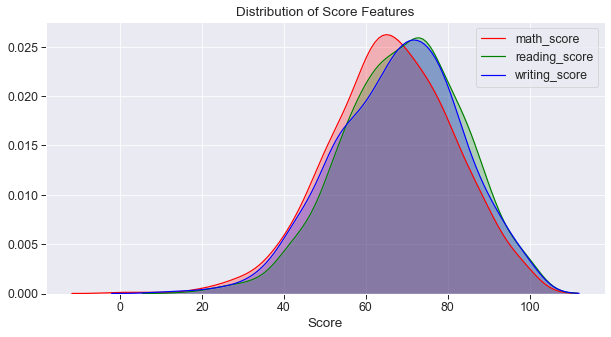

In [4]:
# kdeplot for score variables in single plot
plt.figure(figsize = (10, 5))
sns.kdeplot(df.math_score, color = 'r', shade = True)
sns.kdeplot(df.reading_score, color = 'g', shade = True)
sns.kdeplot(df.writing_score, color = 'b', shade = True)
plt.title('Distribution of Score Features')
plt.xlabel('Score')
plt.show()

## Distribution of Grade

- The count-peak can be seen at B & C grade which means majority of people scored in the range of 80 - 61.
- This result was expected, as the same was reflected on the above plot.

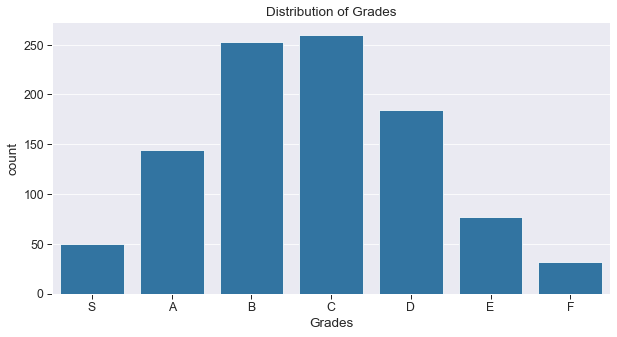

In [5]:
# countplot for grade
plt.figure(figsize = (10, 5))
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'grade', color = base_color)
plt.title('Distribution of Grades')
plt.xlabel('Grades')
plt.show()

## Total Score in Percentage by Test Preparation Course & Gender

- Students who completed the `test_preparation_course` scored high percentage.
- Overall Female students did well in both the categories of `test_prepar̥ation_course`.

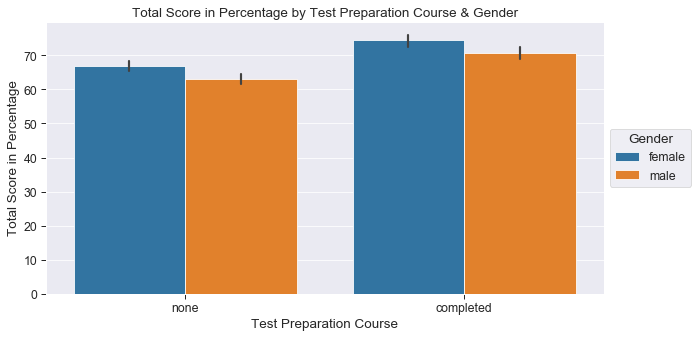

In [6]:
# barplot for both qualitative variable with percentage
plt.figure(figsize = (10, 5))
ax = sns.barplot(data = df, x = 'test_preparation_course', y = 'percentage', hue = 'gender')
ax.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = 'Gender')
plt.title('Total Score in Percentage by Test Preparation Course & Gender')
plt.xlabel('Test Preparation Course')
plt.ylabel('Total Score in Percentage')
plt.show()